In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('Wholesale+Customers+Data.csv')

# Problem 1

Wholesale Customers Analysis (Download Data)

 Problem Statement:

A wholesale distributor operating in different regions of Portugal has information on annual spending of several items in their stores across different regions and channels. The data consists of 440 large retailers’ annual spending on 6 different varieties of products in 3 different regions (Lisbon, Oporto, Other) and across different sales channel (Hotel, Retail).

# 1.1 Use methods of descriptive statistics to summarize data.
# EDA


# Sample of Data:- Head and Tail of the data set

In [4]:
df.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [5]:
df.tail()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
435,436,Hotel,Other,29703,12051,16027,13135,182,2204
436,437,Hotel,Other,39228,1431,764,4510,93,2346
437,438,Retail,Other,14531,15488,30243,437,14841,1867
438,439,Hotel,Other,10290,1981,2232,1038,168,2125
439,440,Hotel,Other,2787,1698,2510,65,477,52


# Shape of Data set

In [6]:
print('No of Rows in the data are:',df.shape[0],'\nNo of Columns in the data Set are:',df.shape[1])

No of Rows in the data are: 440 
No of Columns in the data Set are: 9


# Summary of the data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


Inference: In this Data set we could find 2 of the variables are categorical(labelled as ‘object’) while the remaining 7 are numerical(labelled as ‘int64’). Data set is having  total of 9 columns and 440 Rows.

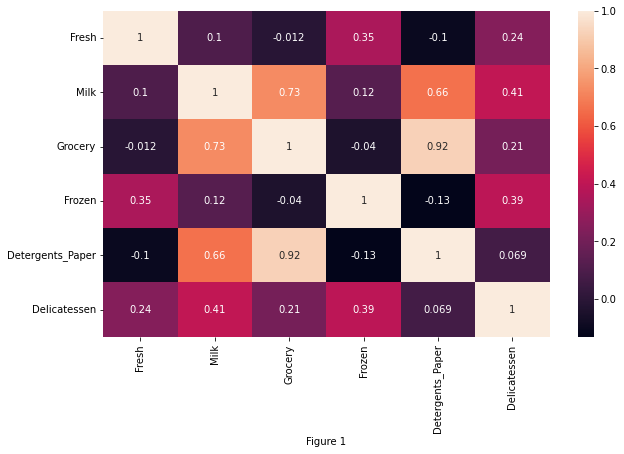

In [8]:
corr=df.corr()
corr.drop(['Buyer/Spender'],axis=1,inplace=True)
corr.drop(['Buyer/Spender'],axis=0,inplace=True)
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)
plt.xlabel('Figure 1')
plt.show()

Inference: Positive correlation/Strong Correlation could be seen between (Grocery & Detergents Paper), (Milk & Grocery), On the other hand we could find Negative Correlation between (Frozen & Detergents Paper )

# 1.1.1 Use methods of descriptive statistics to summarize data

In [9]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Buyer/Spender,440.0,NaN,NaN,NaN,220.5,127.161315,1.0,110.75,220.5,330.25,440.0
Channel,440,2,Hotel,298,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,440,3,Other,316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fresh,440.0,NaN,NaN,NaN,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,NaN,NaN,NaN,5796.265909,7380.377175,55.0,1533.0,3627.0,7190.25,73498.0
Grocery,440.0,NaN,NaN,NaN,7951.277273,9503.162829,3.0,2153.0,4755.5,10655.75,92780.0
Frozen,440.0,NaN,NaN,NaN,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,NaN,NaN,NaN,2881.493182,4767.854448,3.0,256.75,816.5,3922.0,40827.0
Delicatessen,440.0,NaN,NaN,NaN,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


# Checking Null Values

In [10]:
df.isnull().values.any()

False

We can see that there are no null values in the dataset. Hence data is clean for further analysis.

# 1.1.2 Which Region and which Channel spent the most?

In [11]:
df['Spending']=df['Fresh']+df['Milk']+df['Grocery']+df['Frozen']+df['Detergents_Paper']+df['Delicatessen']

Region which spent most is as below
 Region
Other     10677599
Lisbon     2386813
Oporto     1555088
Name: Spending, dtype: int64


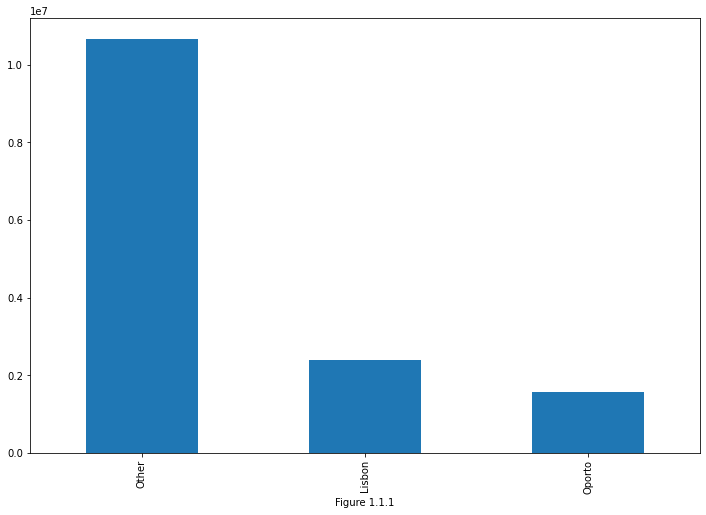

In [12]:
mostregion=df.groupby('Region')['Spending'].sum().sort_values(ascending=False)
mostregion.plot(kind='bar',figsize=(12,8))
print('Region which spent most is as below\n',mostregion.head())
plt.xlabel('Figure 1.1.1')
plt.show()

Channel which spent most is as below
 Channel
Hotel     7999569
Retail    6619931
Name: Spending, dtype: int64


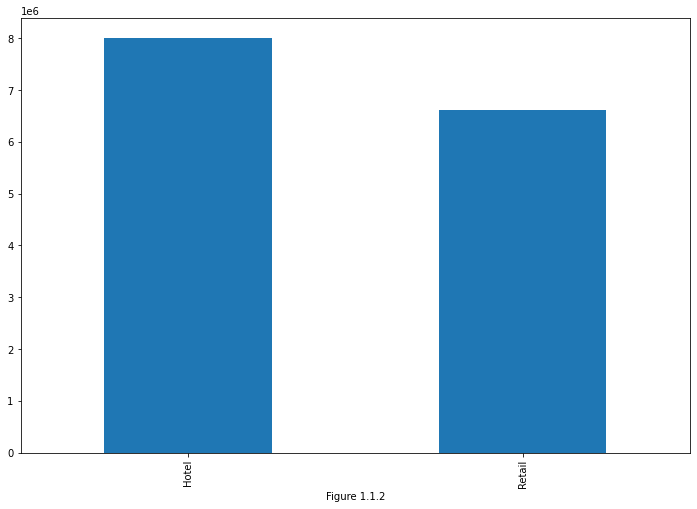

In [13]:
mostchannel=df.groupby('Channel')['Spending'].sum().sort_values(ascending=False)
mostchannel.plot(kind='bar',figsize=(12,8))
print('Channel which spent most is as below\n',mostchannel.head())
plt.xlabel('Figure 1.1.2')
plt.show()

# 1.1.3 Which Region and which Channel spent the least?

Region which spent Least is as below
 Region
Oporto    1555088
Name: Spending, dtype: int64


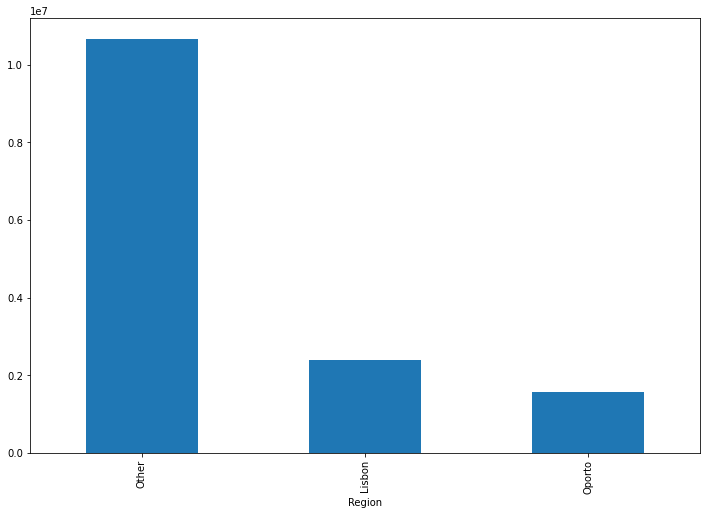

In [14]:
leastregion=df.groupby('Region')['Spending'].sum().sort_values(ascending=False)
leastregion.plot(kind='bar',figsize=(12,8))
print('Region which spent Least is as below\n',mostregion.tail(1))
plt.show()

Channel which spent least is as below
 Channel
Retail    6619931
Name: Spending, dtype: int64


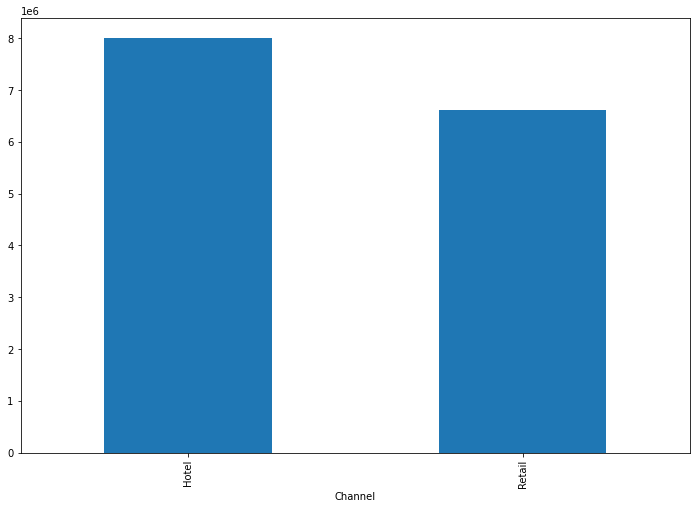

In [15]:
leastchannel=df.groupby('Channel')['Spending'].sum().sort_values(ascending=False)
leastchannel.plot(kind='bar',figsize=(12,8))
print('Channel which spent least is as below\n',mostchannel.tail(1))
plt.show()

In order to identify the most/least spent for Region and Channel separately Bar plot has been used kindly refer to Figure 1.1.1 & Figure 1.1.2

Region	            Spending’s	   Channel	       Spending’s

Other (Most spent)	10677599	Hotel(Most Spent)	7999569

Oporto(Least spent)	1555088	    Retail(Least Spent)	6619931


# 1.2. There are 6 different varieties of items that are considered. Describe and comment/explain all the varieties across Region and Channel? Provide a detailed justification for your answer.

In [16]:
df.columns

Index(['Buyer/Spender', 'Channel', 'Region', 'Fresh', 'Milk', 'Grocery',
       'Frozen', 'Detergents_Paper', 'Delicatessen', 'Spending'],
      dtype='object')

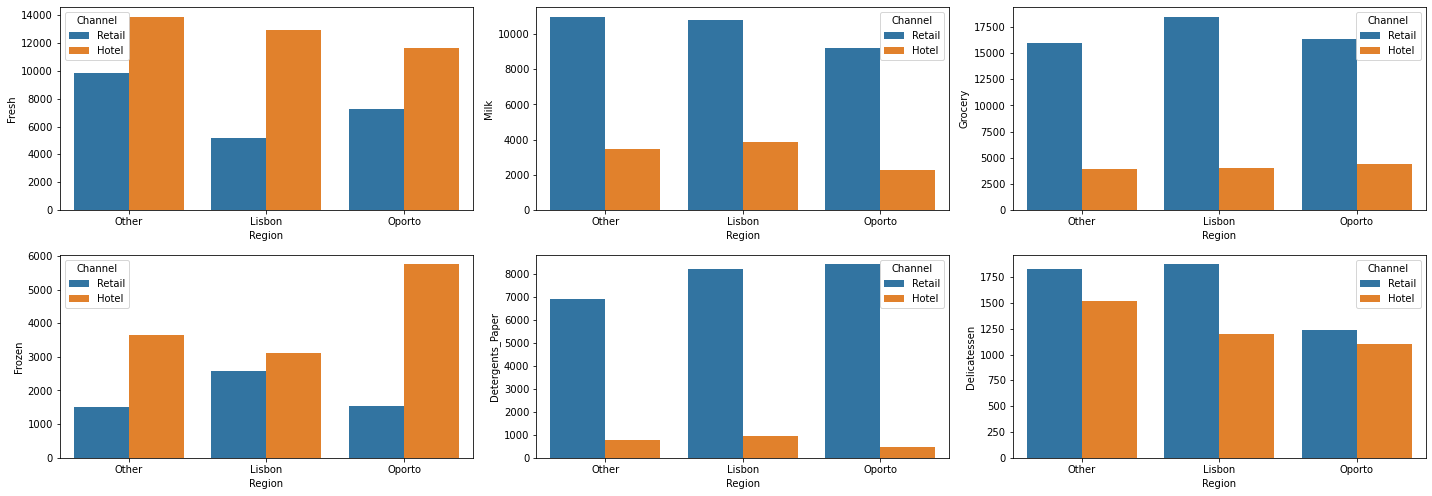

In [20]:
#method-1
plt.figure(figsize=(20,10))
varities=['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']
feature=df[varities].columns
for i in range(len(feature)):
    plt.subplot(3,3,i+1)
    sns.barplot(df['Region'],df[feature[i]],ci=False,hue=df['Channel'])
    plt.tight_layout()

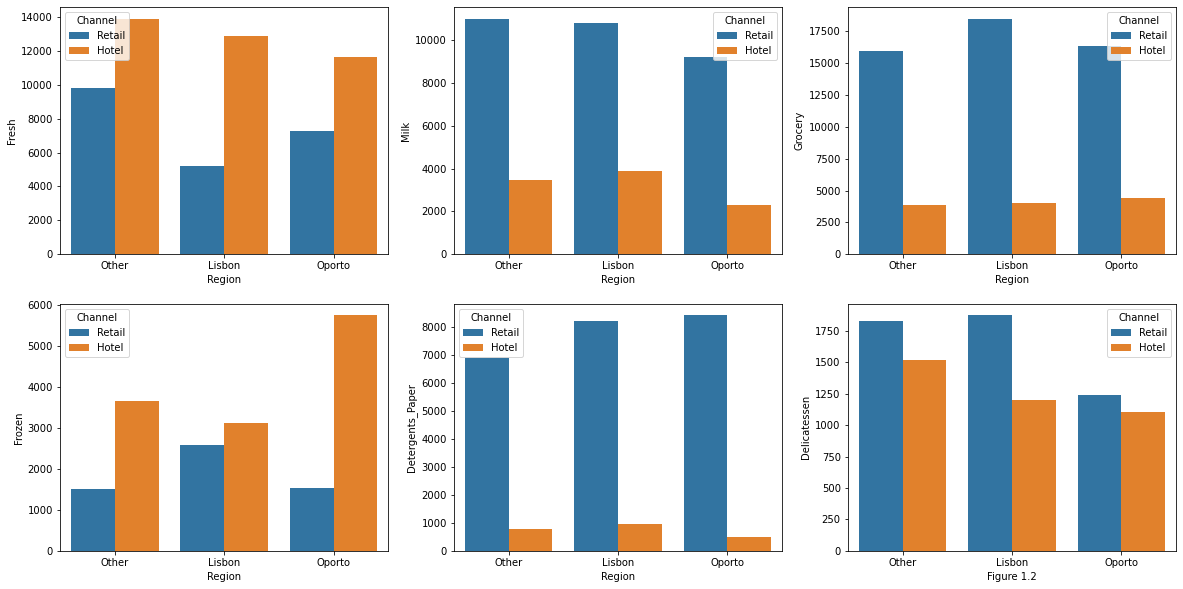

In [21]:
#method-2
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
sns.barplot(df['Region'],df['Fresh'],ci=False,hue=df['Channel'])

plt.subplot(2,3,2)
sns.barplot(df['Region'],df['Milk'],ci=False,hue=df['Channel'])

plt.subplot(2,3,3)
sns.barplot(df['Region'],df['Grocery'],ci=False,hue=df['Channel'])

plt.subplot(2,3,4)
sns.barplot(df['Region'],df['Frozen'],ci=False,hue=df['Channel'])

plt.subplot(2,3,5)
sns.barplot(df['Region'],df['Detergents_Paper'],ci=False,hue=df['Channel'])

plt.subplot(2,3,6)
sns.barplot(df['Region'],df['Delicatessen'],ci=False,hue=df['Channel'])

plt.xlabel('Figure 1.2')

plt.show()

Inference: From the Above bar plot of 6 different varieties of items across Region and Channel we could infer that spending’s for Fresh and Frozen are more in
Hotel’s compared to Retail.

On the other hand categories like Milk, Grocery, Detergent paper & 
Delicatessen show more spending’s in Retail channel compared to Hotel   


# 1.3 On the basis of the descriptive measure of variability, which item shows the most inconsistent behaviour? Which items shows the least inconsistent behaviour?

In [18]:
measureof_variability=df.describe()
measureof_variability.drop(['Buyer/Spender'],axis=1,inplace=True)
measureof_variability.loc['CV']=measureof_variability.loc['std']/measureof_variability.loc['mean']
measureof_variability

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Spending
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455,33226.136364
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937,26356.301730
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000,904.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000,17448.750000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000,27492.000000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000,41307.500000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000,199891.000000
CV,1.053918,1.273299,1.195174,1.580332,1.654647,1.849407,0.793240


Inference: In order to check the Most/least Inconsistency we need to find the 
Coefficient of variation for all the 6 varieties. Referring to the below table we could say that:-

Most inconsistent:- Delicatessen Since the CV value is most among the rest.

Least inconsistent:- Fresh Since the CV value is least among rest



# 1.4 Are there any outliers in the data? Back up your answer with a suitable plot/technique with the help of detailed comments.

<Figure size 432x288 with 0 Axes>

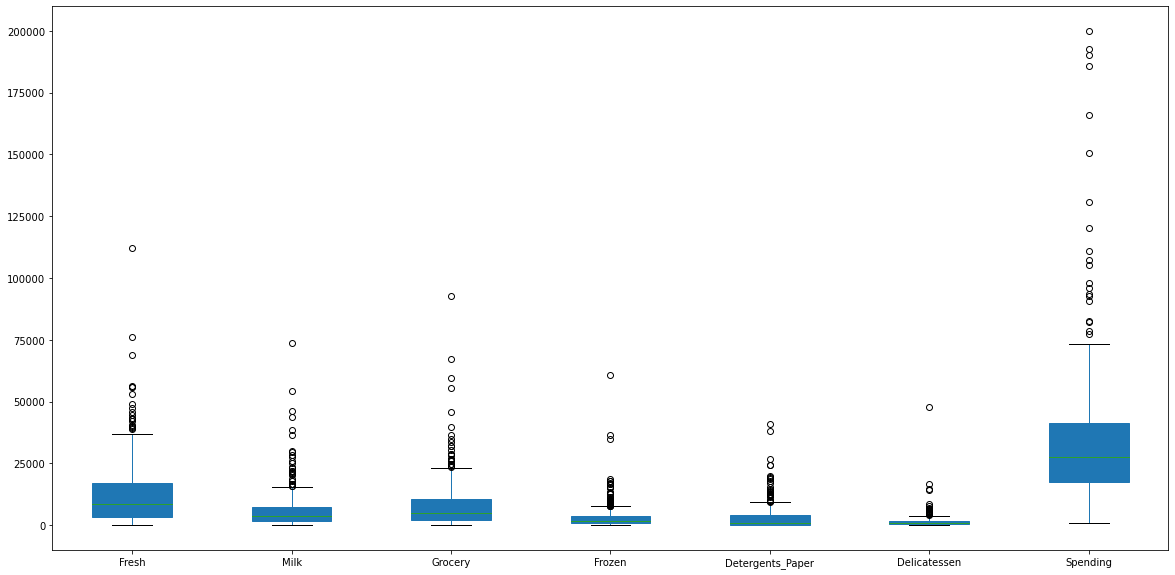

In [19]:
df1=df.drop(['Buyer/Spender'],axis=1)

plt.figure()
df1.plot(kind='box',figsize=(20,10),patch_artist=True)
plt.show()

Inference: Referring to the below Boxplot we could infer that outliers are present in all the 6 varieties. 

# 1.5 On the basis of your analysis, what are your recommendations for the business? How can your analysis help the business to solve its problem? Answer from the business perspective.

From the above data analysis my recommendations would be :-

(1) Hotels spend mostly on Fresh & frozen items because there sales are directly proportional to  Hotels revenue. In order to boost the sales of these product in Retail market as well 
We could launch promotional offer for Retail customers/Set Target related profit margin.

(2) Referring to the correlation between grocery & Detergents, milk & grocery these item should Be kept in same section so that sales of one item could increase the sales of other.

(3) Sales of Delicatessen in most inconsistent hence more focus need to be given in order to understand if extra customer offers need to be applied 



# Problem 2

The Student News Service at Clear Mountain State University (CMSU) has decided to gather data about the undergraduate students that attend CMSU. CMSU creates and distributes a survey of 14 questions and receives responses from 62 undergraduates (stored in the Survey data set).

In [20]:
mydata=pd.read_csv('Survey-1.csv')

# 2.1. For this data, construct the following contingency tables (Keep Gender as row variable)

# 2.1.1. Gender and Major

In [21]:
Gender_major=pd.crosstab(mydata['Gender'],mydata['Major'],margins=True)
Gender_major

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


Inference: Referring to the below table we could infer Retailing/Marketing Major is being chosen more by female students.


# 2.1.2. Gender and Grad Intention

In [22]:
Gender_GradIntention=pd.crosstab(mydata['Gender'],mydata['Grad Intention'],margins=True)
Gender_GradIntention

Grad Intention,No,Undecided,Yes,All
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
All,12,22,28,62


Inference:As per the below table we could say Intention of Graduating is more in Male compared to Female.

# 2.1.3. Gender and Employment

In [23]:
Gender_Employment=pd.crosstab(mydata['Gender'],mydata['Employment'],margins=True)
Gender_Employment

Employment,Full-Time,Part-Time,Unemployed,All
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
All,10,43,9,62


Inference:Referring to the below table we could say Females are more passionate about Part-Time Jobs

# 2.1.4. Gender and Computer

In [24]:
Gender_Computer=pd.crosstab(mydata['Gender'],mydata['Computer'],margins=True)
Gender_Computer

Computer,Desktop,Laptop,Tablet,All
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
All,5,55,2,62


Inference: From the below table we understand Laptop is mostly chosen among other computer gadgets due to its portability.

# 2.2. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

# 2.2.1 What is the probability that a randomly selected CMSU student will be male?

In [25]:
Gender=mydata['Gender'].value_counts()
Gender

Female    33
Male      29
Name: Gender, dtype: int64

In [26]:
Total_Gender=len(mydata)
Total_Gender

62

In [27]:
Probability_Male=len(mydata[mydata['Gender']=='Male'])/len(mydata)
print('probability that a randomly selected CMSU student will be male is',round(Probability_Male*100,2),'%')

probability that a randomly selected CMSU student will be male is 46.77 %


# 2.2.2 What is the probability that a randomly selected CMSU student will be female?

In [28]:
Probability_Female=len(mydata[mydata['Gender']=='Female'])/len(mydata)
print('probability that a randomly selected CMSU student will be female is',round(Probability_Female*100,2),'%')

probability that a randomly selected CMSU student will be female is 53.23 %


# 2.3. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

# 2.3.1 Find the conditional probability of different majors among the male students in CMSU.

In [29]:
Gender_major

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


In [30]:
Male_accounting=4/29
print('Probability of Male students in CMSU',round(Male_accounting*100,2),'%')
Male_CIS=1/29
print('Probability of Male students in CIS',round(Male_CIS*100,2),'%')
Male_Economics_Finance=4/29
print('Probability of Male students in Economics/Finance',round(Male_Economics_Finance*100,2),'%')
Male_International_Business=2/29
print('Probability of Male students in International Business',round(Male_International_Business*100,2),'%')
Male_Management=6/29
print('Probability of Male students in Management',round(Male_Management*100,2),'%')
Male_Other=4/29
print('Probability of Male students in Other',round(Male_Other*100,2),'%')
Male_Retailing_Marketing=5/29
print('Probability of Male students in Retailing/Marketing',round(Male_Retailing_Marketing*100,2),'%')
Male_Undecided=3/29
print('Probability of Male students in Undecided',round(Male_Undecided*100,2),'%')


Probability of Male students in CMSU 13.79 %
Probability of Male students in CIS 3.45 %
Probability of Male students in Economics/Finance 13.79 %
Probability of Male students in International Business 6.9 %
Probability of Male students in Management 20.69 %
Probability of Male students in Other 13.79 %
Probability of Male students in Retailing/Marketing 17.24 %
Probability of Male students in Undecided 10.34 %


# 2.3.2 Find the conditional probability of different majors among the female students of CMSU.

In [31]:
Female_accounting=3/33
print('Probability of Female students in CMSU',round(Female_accounting*100,2),'%')
Female_CIS=3/33
print('Probability of Female students in CIS',round(Female_CIS*100,2),'%')
Female_Economics_Finance=7/33
print('Probability of Female students in Economics/Finance',round(Female_Economics_Finance*100,2),'%')
Female_International_Business=4/33
print('Probability of Female students in International Business',round(Female_International_Business*100,2),'%')
Female_Management=4/33
print('Probability of Female students in Management',round(Female_Management*100,2),'%')
Female_Other=3/33
print('Probability of Female students in Other',round(Female_Other*100,2),'%')
Female_Retailing_Marketing=9/33
print('Probability of Female students in Retailing/Marketing',round(Female_Retailing_Marketing*100,2),'%')
Female_Undecided=0/33
print('Probability of Female students in Undecided',round(Female_Undecided*100,2),'%')


Probability of Female students in CMSU 9.09 %
Probability of Female students in CIS 9.09 %
Probability of Female students in Economics/Finance 21.21 %
Probability of Female students in International Business 12.12 %
Probability of Female students in Management 12.12 %
Probability of Female students in Other 9.09 %
Probability of Female students in Retailing/Marketing 27.27 %
Probability of Female students in Undecided 0.0 %


# 2.4. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

# 2.4.1 Find the probability That a randomly chosen student is a male and intends to graduate.

In [32]:
Gender_GradIntention

Grad Intention,No,Undecided,Yes,All
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
All,12,22,28,62


In [33]:
print('probability That a randomly chosen student is a male and intends to graduate would be',round(17/29*29/62*100,2),'%')

probability That a randomly chosen student is a male and intends to graduate would be 27.42 %


# 2.4.2 Find the probability that a randomly selected student is a female and does NOT have a laptop.

In [34]:
Gender_Computer

Computer,Desktop,Laptop,Tablet,All
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
All,5,55,2,62


In [35]:
print('probability that a randomly selected student is a female and does NOT have a laptop would be',round((33-29)/33*33/62*100,2),'%')

probability that a randomly selected student is a female and does NOT have a laptop would be 6.45 %


# 2.5. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

# 2.5.1 Find the probability that a randomly chosen student is a male or has a full-time employment

In [36]:
Gender_Employment

Employment,Full-Time,Part-Time,Unemployed,All
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
All,10,43,9,62


In [37]:
print(' probability that a randomly chosen student is a male or has a full-time employment is',round(((29/62)+(10/62)-(7/62))*100,2),'%')

 probability that a randomly chosen student is a male or has a full-time employment is 51.61 %


# 2.5.2 Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.

In [38]:
Gender_major

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


In [39]:
print('probability that a given female student is majoring in international business or management :',round((4/33+4/33)*100,2),'%')

probability that a given female student is majoring in international business or management : 24.24 %


# 2.6 Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think graduate intention and being female are independent events?

In [40]:
Gender_GradIntention

Grad Intention,No,Undecided,Yes,All
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
All,12,22,28,62


In [41]:
Yes_No=Gender_GradIntention.copy()

In [42]:
Yes_No.drop(['All'],axis=0,inplace=True)

In [43]:
Yes_No

Grad Intention,No,Undecided,Yes,All
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29


In [44]:
20/40 * 28/40

0.35

In [45]:
11/40

0.275

For 2 events to be independent, following condition is to be satified

P($A \cap B$) = P(A) * P(B)

P(A|B) = P(A)

So, P($Graduate Intention | Female $) = P(Graduate Intention) * P(Female)

P(Female)= 20/40 = 0.5

P(Graduate Intention)= 28/40 = 0.7

P(Graduate Intention)* P(Female)= 0.5 * 0.7 = 0.35

P($Graduate Intention \cap Female $ ) = 11/40 = 0.275

P($Graduate Intention | Female $) $\neq$ P(Graduate Intention) * P(Female)



# 2.7 Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending and Text Messages. Answer the following questions based on the data

# 2.7.1 If a student is chosen randomly, what is the probability that his/her GPA is less than 3?

In [46]:
lessthan3=mydata[mydata['GPA']< 3]
lessthan3

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100
5,6,Female,22,Senior,Economics/Finance,Undecided,2.3,Unemployed,78.0,3,2,700,Laptop,30
10,11,Female,23,Senior,Economics/Finance,Yes,2.8,Full-Time,50.0,2,5,400,Laptop,200
23,24,Male,22,Senior,Undecided,Yes,2.6,Full-Time,45.0,1,5,400,Laptop,600
27,28,Female,20,Junior,International Business,Yes,2.9,Part-Time,50.0,3,1,900,Laptop,100
31,32,Male,20,Junior,Other,Yes,2.9,Part-Time,47.0,3,1,300,Laptop,300
33,34,Male,22,Senior,Retailing/Marketing,Yes,2.6,Full-Time,40.0,1,4,1400,Laptop,800


In [47]:
len(lessthan3)

17

In [48]:
len(mydata['GPA'])

62

In [49]:
print('probability that his/her GPA is less than3:',round((17/62)*100,2),'%')

probability that his/her GPA is less than3: 27.42 %


# 2.7.2 Find conditional probability that a randomly selected male earns 50 or more. Find conditional probability that a randomly selected female earns 50 or more.

In [50]:
More=mydata[mydata['Salary']>= 50]

In [51]:
pd.crosstab(More['Gender'],More['Salary'],margins=True)

Salary,50.0,52.0,54.0,55.0,60.0,65.0,70.0,78.0,80.0,All
Gender,,,,,,,,,,
Female,5,0,0,5,5,0,1,1,1,18
Male,4,1,1,3,3,1,0,0,1,14
All,9,1,1,8,8,1,1,1,2,32


In [52]:
Male50above=14/29
print('probability that a randomly selected male earns 50 or more',round(Male50above*100,2),'%')

probability that a randomly selected male earns 50 or more 48.28 %


In [53]:
Female50above=18/33
print('probability that a randomly selected Female earns 50 or more',round(Female50above*100,2),'%')

probability that a randomly selected Female earns 50 or more 54.55 %


# 2.8. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending and Text Messages. For each of them comment whether they follow a normal distribution.

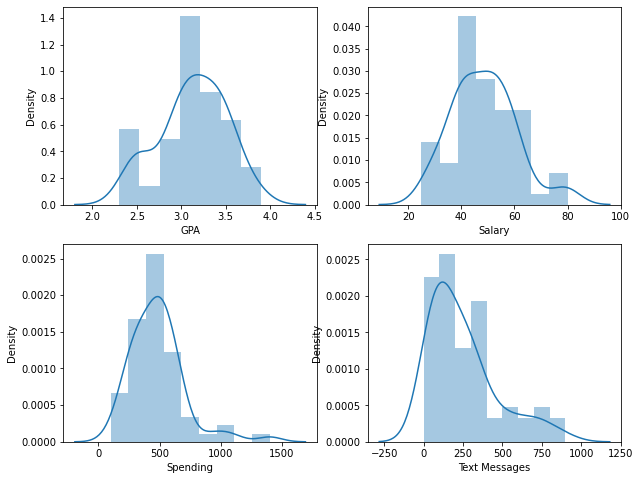

In [54]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.distplot(mydata['GPA'])

plt.subplot(2,2,2)
sns.distplot(mydata['Salary'])

plt.subplot(2,2,3)
sns.distplot(mydata['Spending'])

plt.subplot(2,2,4)
sns.distplot(mydata['Text Messages'])

plt.show()

In [55]:
from scipy.stats import shapiro
print('GPA:',shapiro(mydata['GPA']))
print('Salary',shapiro(mydata['Salary']))
print('Spending',shapiro(mydata['Spending']))
print('Text Messages',shapiro(mydata['Text Messages']))

GPA: ShapiroResult(statistic=0.9685361981391907, pvalue=0.11204058676958084)
Salary ShapiroResult(statistic=0.9565856456756592, pvalue=0.028000956401228905)
Spending ShapiroResult(statistic=0.8777452111244202, pvalue=1.6854661225806922e-05)
Text Messages ShapiroResult(statistic=0.8594191074371338, pvalue=4.324040673964191e-06)


Inference: As per Shapiro Wilk test, out of 4 numerical (continuous) variables in the data set, only GPA follows normal dist	ribution. Salary, Spending, Text Messages do not follow normal distribution as their P- values are less than 0.05 which is level of significance.

# Problem 3 (Download Data)

An important quality characteristic used by the manufacturers of ABC asphalt shingles is the amount of moisture the shingles contain when they are packaged. Customers may feel that they have purchased a product lacking in quality if they find moisture and wet shingles inside the packaging.   In some cases, excessive moisture can cause the granules attached to the shingles for texture and coloring purposes to fall off the shingles resulting in appearance problems. To monitor the amount of moisture present, the company conducts moisture tests. A shingle is weighed and then dried. The shingle is then reweighed, and based on the amount of moisture taken out of the product, the pounds of moisture per 100 square feet are calculated. The company would like to show that the mean moisture content is less than 0.35 pounds per 100 square feet.

The file (A & B shingles.csv) includes 36 measurements (in pounds per 100 square feet) for A shingles and 31 for B shingles.

In [22]:
Newdata=pd.read_csv('/Users/prikshetsuhag/Desktop/OneDrive/Python related files/post deferment rejoined/Module 2- Statistical Methods for Decision Making/Week 3-Hypothesis Testing/Project Work/A+&+B+shingles.csv')

In [23]:
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind

# 3.1 Do you think there is evidence that mean moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps.

Step 1 Define null and alternate hypotheses

H0: $\mu$ is = 0.35

H1: $\mu$ is < 0.35

Step 2 Define Level of significance value

$\alpha$ = 0.05

step 3 Identify the Test Statistic 

n = 36 (sample size)

standard deviation is not know to us in this problem hence we will go ahead with t distribution and the t test statistic

Step 4: Calculate the p - value and test statistic


In [71]:
t_statistic,p_value= stats.ttest_1samp(Newdata['A'],0.35)
print('One sample t test \nt statistic: {0} p_value: {1} '.format(t_statistic, p_value))

One sample t test 
t statistic: -1.4735046253382782 p_value: 0.14955266289815025 


In [72]:
a=p_value/2
a

0.07477633144907513

conclusion: Since p_value is> $\alpha$ we fail to reject the null hypotheses, there are not enough evidence to conclude that the $\mu$ moisture content for Sample A Shingles is less than 0.35 pounds per 100 square feet.

In [73]:
t_statistic,p_value= stats.ttest_1samp(Newdata['B'],0.35,nan_policy='omit')
print('One sample t test \nt statistic: {0} p_value: {1} '.format(t_statistic, p_value))

One sample t test 
t statistic: -3.1003313069986995 p_value: 0.004180954800638365 


In [74]:
b=p_value/2
b

0.0020904774003191826

Conclusion: Since p_value is< $\alpha$ we reject the null hypotheses, there are enough evidence to conclude that the $\mu$ moisture content for Sample B Shingles is less than 0.35 pounds per 100 square feet. 

# 3.2 Do you think that the population means for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?

Step 1 Define null and alternate hypotheses

H0: $\mu$ is = 0.35

H1: $\mu$ is $\neq$ 0.35

Step 2 Defind Level of significance value

$\alpha$ = 0.05

step 3 Identify the Test Statistic 

n = 36 (sample size)

standard deviation is not know to us in this problem hence we will go ahead with t distribution and the t test statistic

Step 4: Calculate the p - value and test statistic

In [81]:
t_statistic,p_value=ttest_ind(Newdata['A'],Newdata['B'],equal_var=True,nan_policy='omit')
print('Two sample t test \nt statistic: {0} p_value: {1} '.format(t_statistic, p_value))

Two sample t test 
t statistic: 1.2896282719661123 p_value: 0.2017496571835306 


Conclusion:Since p_value is> $\alpha$ we fail to reject the null hypotheses, there are not enough evidence to conclude that the $\mu$ moisture content for Sample A & Sample B Shingles are not equal. 